## Medical Health Insurance Premium Prediction
This project focuses on predicting medical health insurance costs using various regression models. The goal is to create a model that can accurately estimate the insurance costs for individuals based on their attributes. The project employs exploratory data analysis, data preprocessing, and several regression techniques to achieve this.

## Dataset
The dataset used for this project contains information about individuals' attributes and their corresponding medical insurance costs. The attributes include age, sex, BMI, number of children, smoking habits, and region.

Source: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

In [2]:
# importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance_data.csv')

### Data Preprocessing

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis

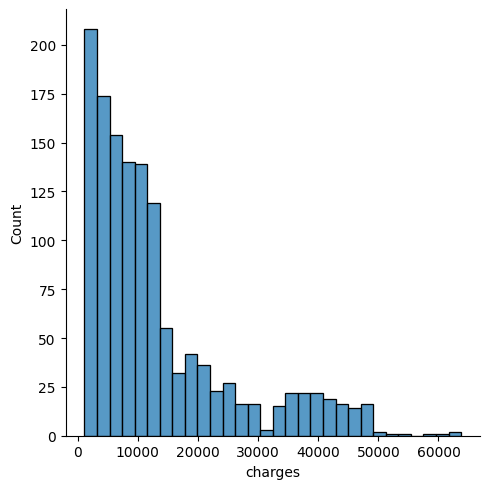

In [8]:
# checking for skewness
skewed = sns.displot(df['charges'])
skewed

- Charges is right-skewed

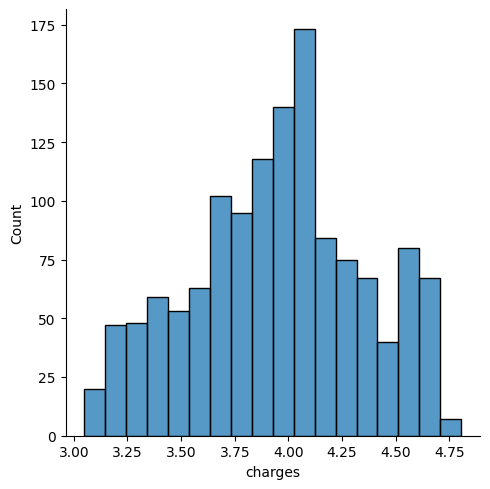

In [9]:
# applying log transform to correct skewness
log_trans = sns.displot(np.log10(df['charges']))
log_trans

In [10]:
# charges by region
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64

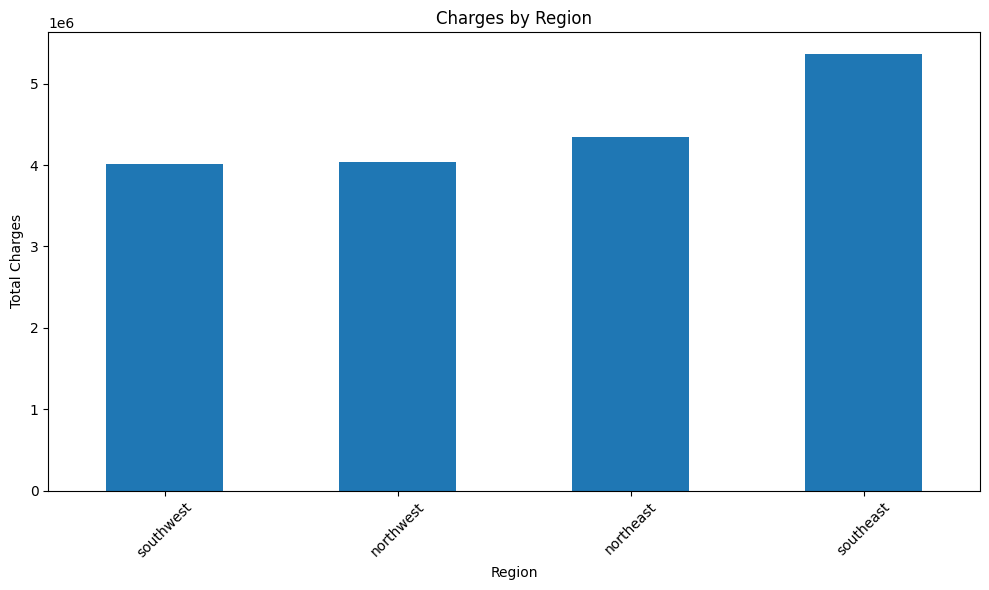

In [11]:
plt.figure(figsize=(10, 6))
charges.plot(kind='bar')
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='children', ylabel='charges'>

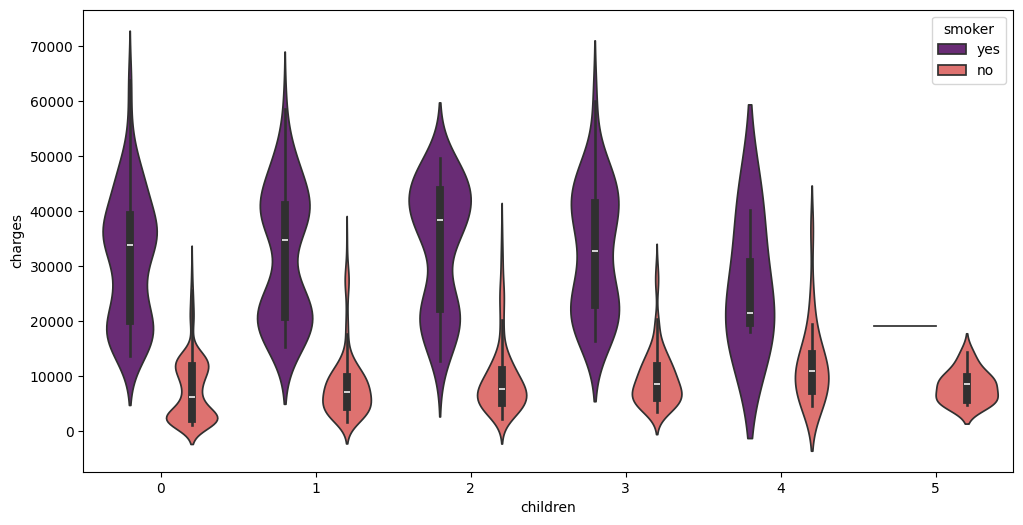

In [12]:
plt.figure(figsize=(12,6))
sns.violinplot(data = df, x = 'children', y = 'charges', hue = 'smoker', split = False, palette = 'magma')

<Axes: xlabel='region', ylabel='charges'>

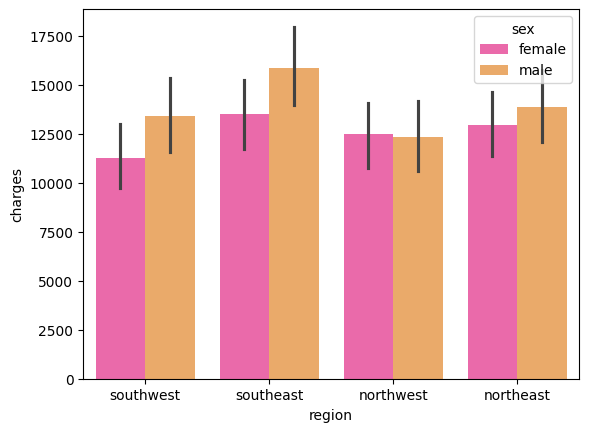

In [13]:
# charges by region by their gender
sns.barplot(data = df, x='region', y='charges', hue='sex', palette='spring')

<Axes: xlabel='region', ylabel='charges'>

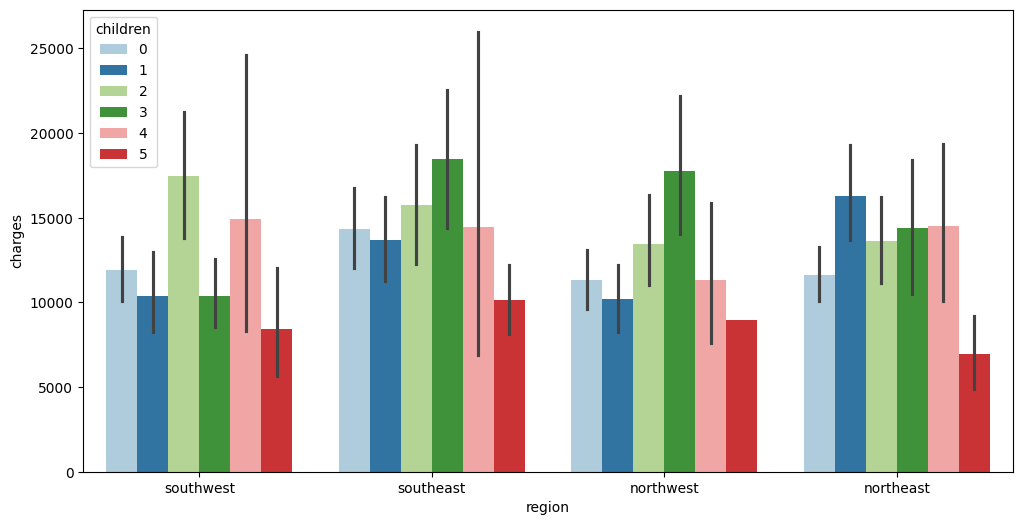

In [14]:
# check the charges by region by the children available
plt.figure(figsize=(12,6))
sns.barplot(data = df, x = 'region', y= 'charges',  hue = 'children', palette='Paired')

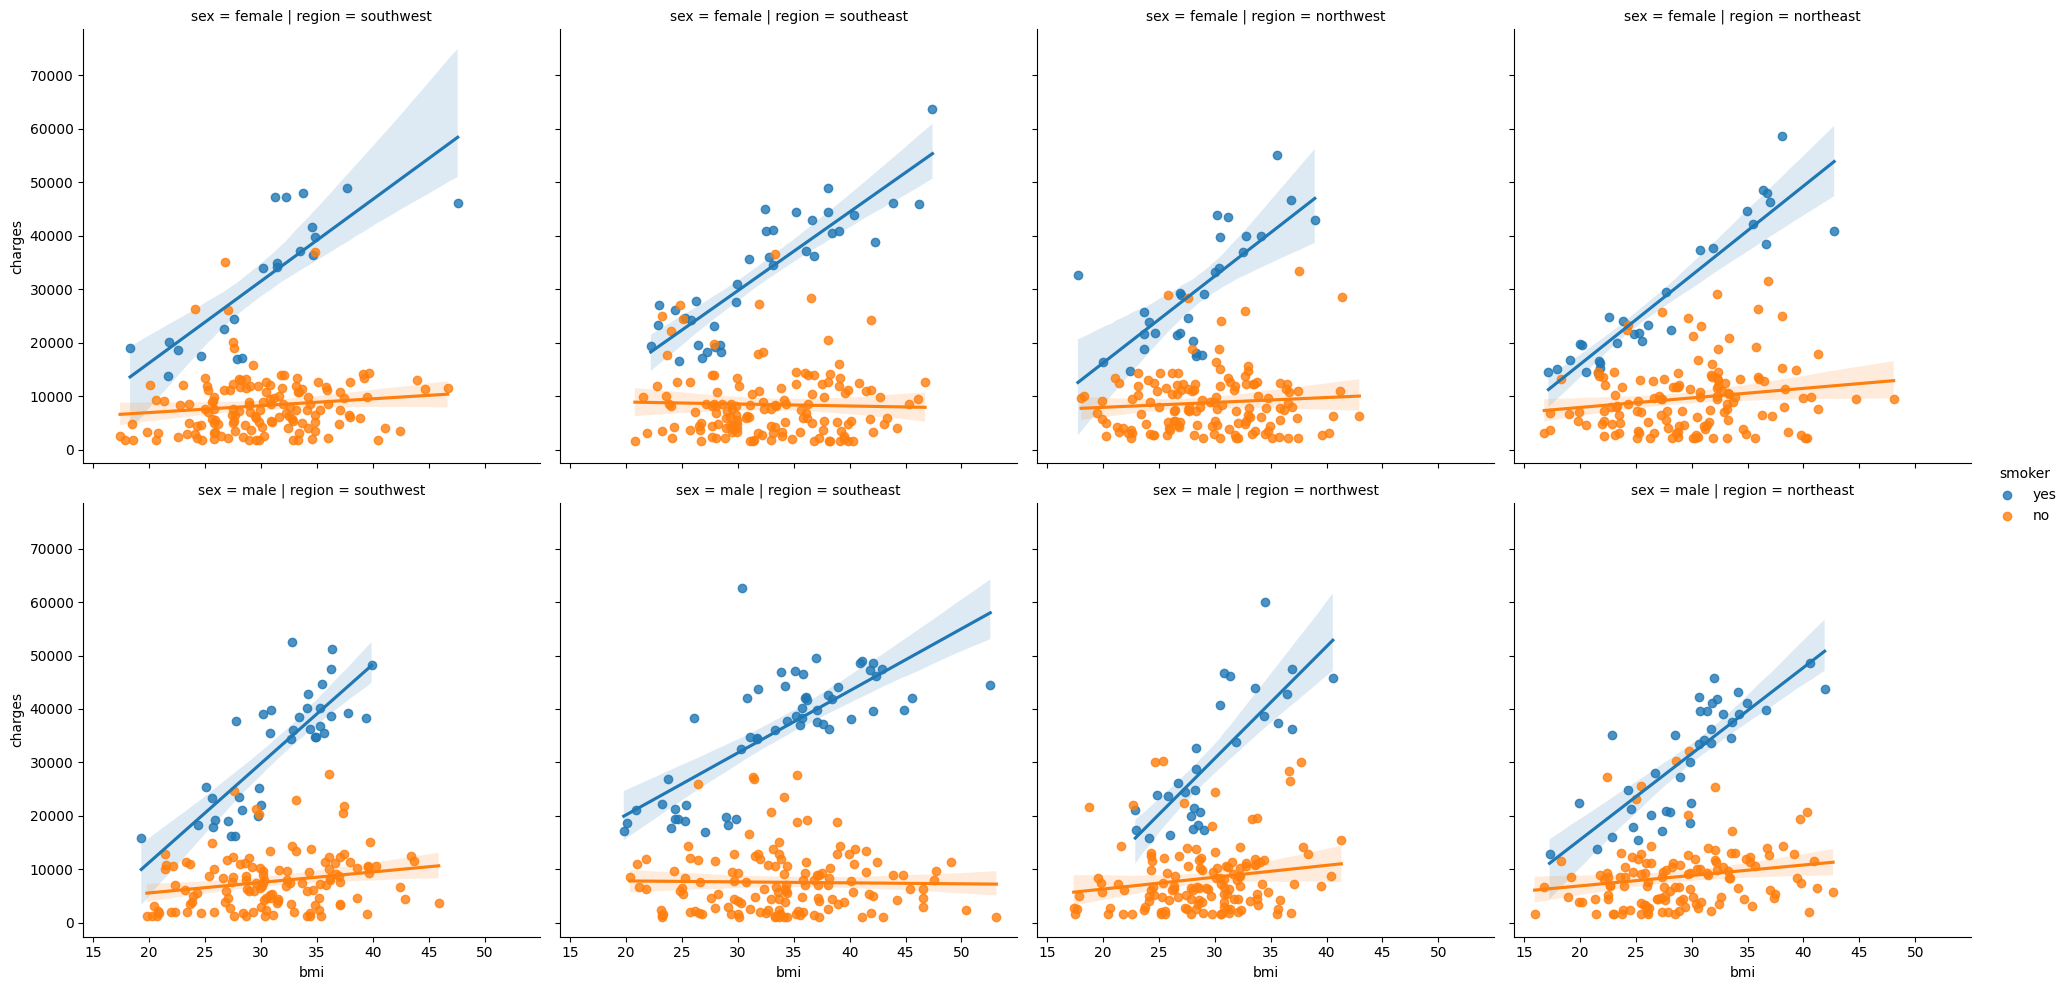

In [15]:
#regression plot to understand the relationship between the bmi and charges considering
sns.lmplot(x = "bmi", y = "charges", row = "sex", col = "region", hue = 'smoker', data = df)

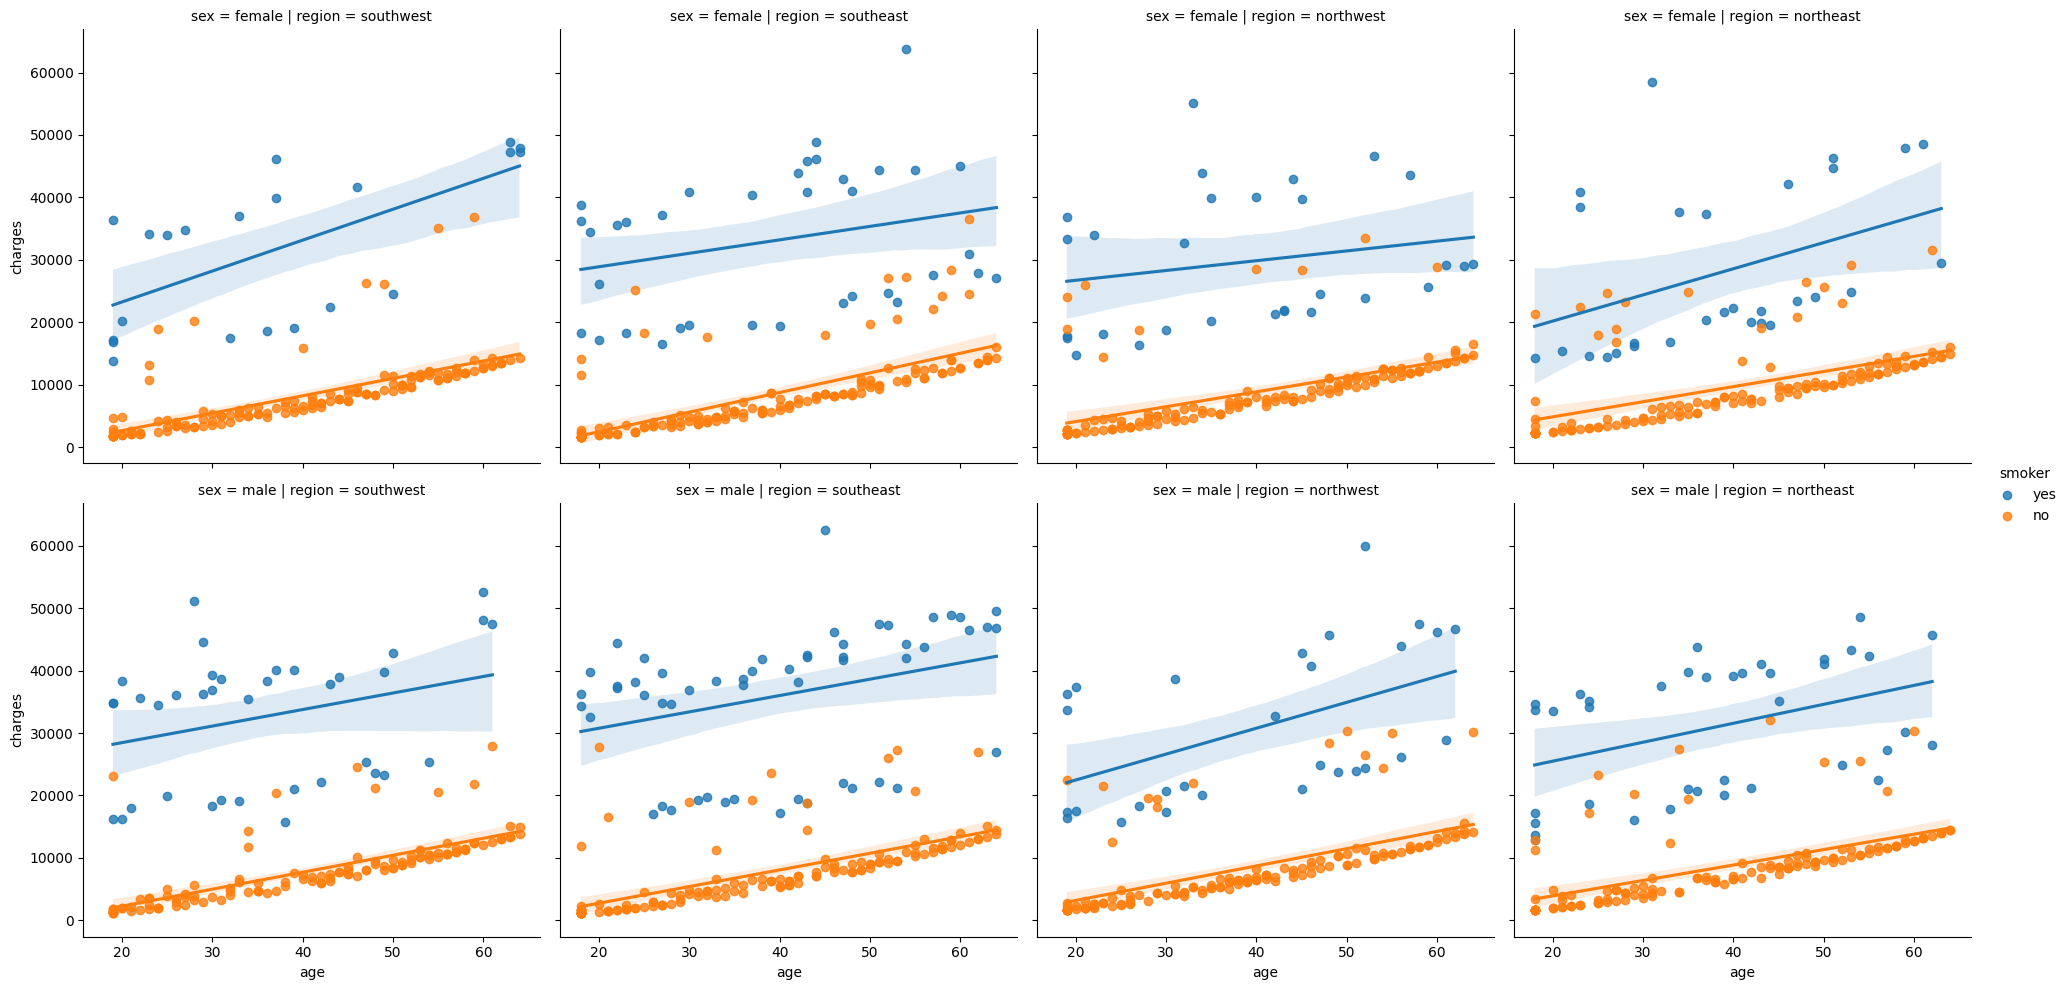

In [16]:
#regression plot to understand the relationship between the Age and Charges considering
sns.lmplot(x = "age", y = "charges", row = "sex", col = "region", hue = 'smoker', data = df)

In [17]:
# Convert object labels to categorical data type
df[['sex', 'region', 'smoker']] = df[['sex', 'region', 'smoker']].astype('category')

print(df.dtypes)

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [18]:
# Converting category labels into numerical using LabelEncoder
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

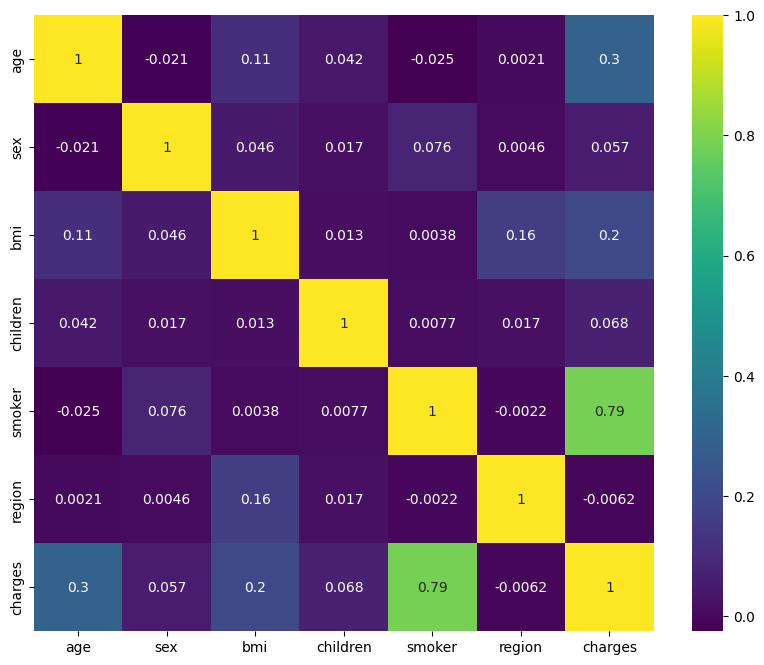

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [21]:
# split dataset
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [24]:
import statsmodels.api as sm

In [25]:
#add constant to predictor variables
x2 = sm.add_constant(x_train)

In [26]:
#fit linear regression model
model = sm.OLS(y_train, x2).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          2.71e-308
Time:                        21:07:43   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.195e+04   1086.938    -10.991      0.000   -1.41e+04   -9813.820
age          257.0563     13.452     19.109      0.000     230.661     283.451
sex          -18.7915    375.770     -0.050      0.960    -756.126     718.543
bmi          335.7815     31.655     10.607      0.000     273.668     397.895
children     425.0915    154.431      2.753      0.006     122.067     728.116
smoker      2.365e+04    465.245     50.829      0.000    2.27e+04    2.46e+04
region      -271.2843    170.373     -1.592      0.112    -605.590      63.022
==============================================================================
Omnibus:                      251.823   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.548
Skew:                           1.251   Prob(JB):                    1.60e-133
Kurtosis:                       5.731   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression Models

### 1. Multiple Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [29]:
lm.fit(x_train,y_train)

LinearRegression()

In [30]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(x_test, y_test))

Intercept -11946.606567263034
Coefficient [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
Score 0.7833463107364539


In [31]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266


In [32]:
y_pred1 = lm.predict(x_test)

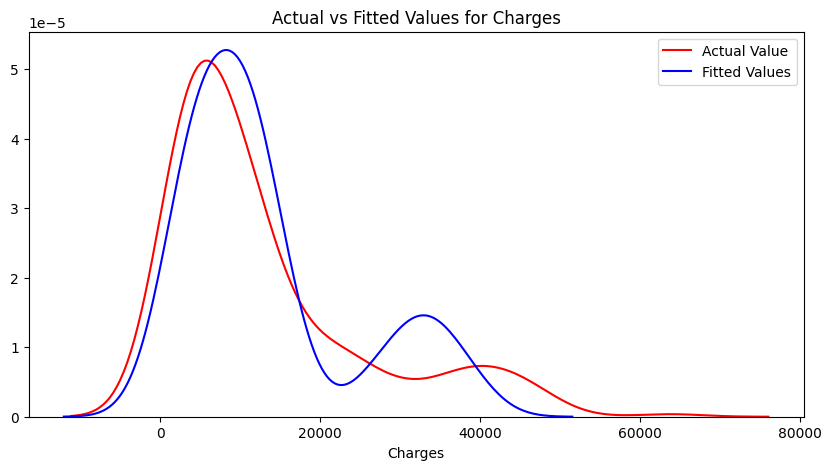

In [33]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.legend()
plt.show()
plt.close()

In [34]:
# actual and predicted values
predicted1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predicted1.head()

,Actual,Predicted
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008


### 2. Lasso Regression Model

In [35]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [36]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=101) #we’ll use the RepeatedKF

#define model
lasso_model = LassoCV(alphas=(0.1, 1.0, 10.0), cv=cv, n_jobs=-1)

#fit model
lasso_model.fit(x_train, y_train)

LassoCV(alphas=(0.1, 1.0, 10.0),
        cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=101),
        n_jobs=-1)

In [37]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(x_test, y_test))

Intercept -11946.606567263034
Coefficient [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
Score 0.7833463107364539


In [38]:
# prediction of lasso regression
y_pred2 = lasso_model.predict(x_test)

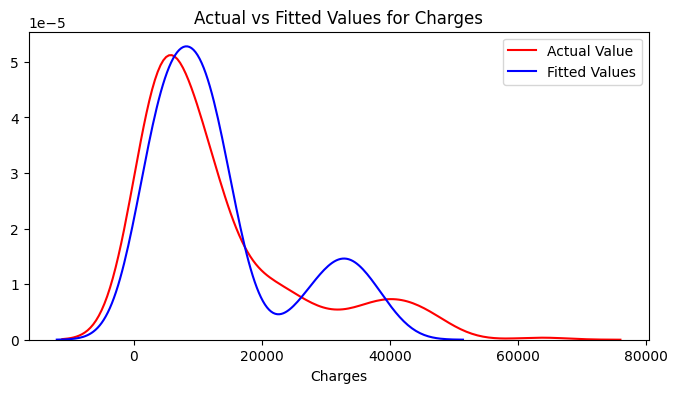

In [39]:
# Visualising the Lasso Regression results
plt.figure(figsize=(8, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.legend()
plt.show()
plt.close()

In [40]:
# actual and predicted values
predicted2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predicted2.head()

,Actual,Predicted
764,9095.06825,8911.659191
887,5272.17580,7123.036794
890,29330.98315,36852.479165
1293,9301.89355,9515.428284
259,33750.29180,26976.771303


### 3. Ridge Regression Model

In [41]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [42]:
#define cross-validation method to evaluate model
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101) 

#define model
rid_model = RidgeCV(alphas=(0.1,  1.0,  10.0), cv=cv, scoring='neg_mean_absolute_error')

#fit model
rid_model.fit(x_train, y_train)

RidgeCV(cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=101),
        scoring='neg_mean_absolute_error')

In [43]:
print(rid_model.intercept_)
print(rid_model.coef_)
print(rid_model.score(x_test, y_test))

-11943.455858669682
[ 2.57035723e+02 -1.80109296e+01  3.35782790e+02  4.25136864e+02
  2.36341868e+04 -2.71303705e+02]
0.7833217621706015


In [44]:
y_pred3 = rid_model.predict(x_test)

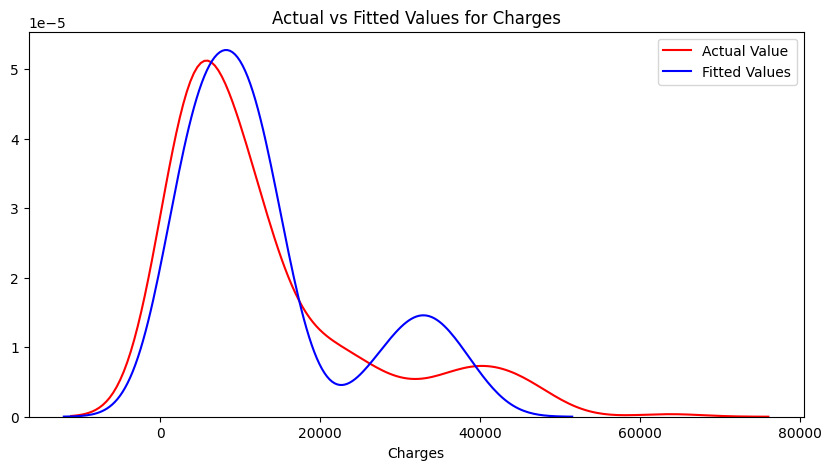

In [45]:
# Visualising the Ridge Regression results
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.legend()
plt.show()
plt.close()

In [46]:
predicted3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
predicted3.head()

,Actual,Predicted
764,9095.06825,8926.757144
887,5272.17580,7118.725826
890,29330.98315,36897.233767
1293,9301.89355,9511.011287
259,33750.29180,27003.281662


In [47]:
### 4. ElasticNet Regressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

In [48]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
net_model = ElasticNet(alpha=0.1, l1_ratio=0.9, fit_intercept=True, max_iter=1000, random_state=1)

# evaluate model
scores = cross_val_score(net_model, x_train,y_train, scoring='neg_mean_absolute_error', cv=cv)

net_model.fit(x_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=1)

In [49]:
print(net_model.intercept_)
print(net_model.coef_)
print(net_model.score(x_test, y_test))

-11626.875213341189
[  254.98398073    56.64093616   335.90294961   429.44085068
 22273.01597223  -273.05052278]
0.7789260673175409


In [50]:
y_pred4 = net_model.predict(x_test)

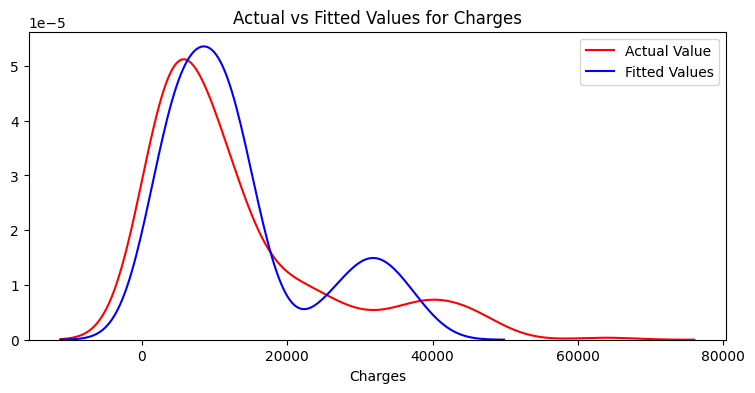

In [51]:
# Visualising the ElasticNet Regressor results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred4, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.legend()
plt.show()
plt.close()

In [52]:
predicted4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
predicted4.head()

,Actual,Predicted
764,9095.06825,9162.642377
887,5272.17580,7363.304117
890,29330.98315,35722.815803
1293,9301.89355,9822.122303
259,33750.29180,25996.448958


### 5. Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
Ram_reg = RandomForestRegressor(n_estimators=100, criterion='squared_error', min_samples_split=2)

# fit the regressor model
Ram_reg.fit(x_train, y_train)

RandomForestRegressor()

In [55]:
print(Ram_reg.score(x_test, y_test))

0.8646802875261483


In [56]:
y_pred5 = Ram_reg.predict(x_test)

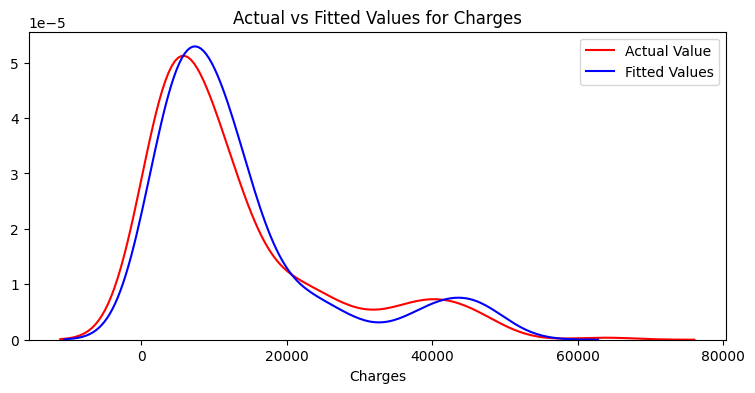

In [57]:
# Visualising the Random Forest Regressor results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred5, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.legend()
plt.show()
plt.close()

In [58]:
# actual and predicted values
predicted5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5})
predicted5.head()

,Actual,Predicted
764,9095.06825,10915.237880
887,5272.17580,5025.879365
890,29330.98315,28621.121711
1293,9301.89355,10605.513005
259,33750.29180,34461.126837


### we select the best features using feature importance from random forest regressor

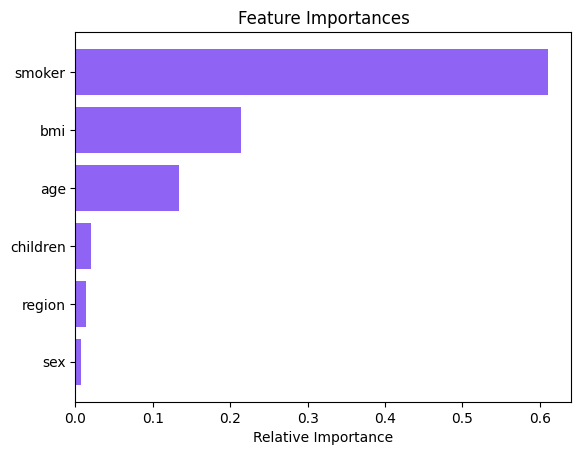

In [59]:
features = x.columns
importances = Ram_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

- We can see that the smoker, bmi and age are more important features compared to the other features.

In [60]:
# select the import features
x = df.drop(['charges', 'region', 'sex'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [61]:
x

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [62]:
# build a model using the polynomial regression after feature importance

### Polynomial Regression Model

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

x_poly = poly_reg.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 0)

In [64]:
pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)

LinearRegression()

In [65]:
print(pol_reg.intercept_)
print(pol_reg.coef_)
print(pol_reg.score(x_test, y_test))

-5325.881705253518
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345231


In [66]:
y_pred6 = pol_reg.predict(x_test)

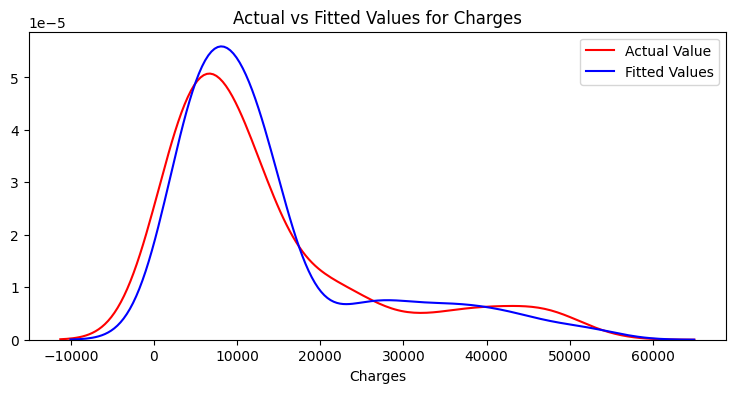

In [67]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred6, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.legend()
plt.show()
plt.close()

## Model Evaluation
- The performance of each regression model is evaluated using various metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [68]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [69]:
# Multiple Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 10976.93032415958
Mean Square Error: 225340349.96269003
Root Mean Square Error: 15011.340711698273


In [70]:
# LassoCV Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 10968.76909663481
Mean Square Error: 224915279.38457984
Root Mean Square Error: 14997.17571359954


In [71]:
# RidgeCV Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 10975.462165520714
Mean Square Error: 225254498.69396153
Root Mean Square Error: 15008.480892280922


In [72]:
# ElasticNet Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

Mean Absolute Error: 10838.727060068726
Mean Square Error: 216982294.5125357
Root Mean Square Error: 14730.31888699412


In [73]:
# Random forest regressor
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred5))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 11536.85603579885
Mean Square Error: 267118528.51486558
Root Mean Square Error: 16343.761149590555


In [74]:
# Polynomial Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred6))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 2824.4950454776445
Mean Square Error: 18895160.09878035
Root Mean Square Error: 4346.856346692441


- From the model evaluation score, we can see that polynomial regression and the Random Forest Regressor are performing well than the other models.

### Saving Model for Deployment

In [75]:
import joblib

# Save the trained model with joblib
model_filename = 'regression_model.joblib'
joblib.dump(lm, model_filename)


['regression_model.joblib']

### Key Insights
1. Feature Importance: After analyzing the dataset, we found that the most influential factors affecting medical insurance charges are whether the person is a smoker, their BMI (Body Mass Index), and their age.
2. Smoking Impact: Smokers tend to have significantly higher medical insurance charges compared to non-smokers. This is a crucial insight that highlights the importance of lifestyle choices on healthcare costs.
3. Age and Charges: The age of an individual is positively correlated with insurance charges. Older individuals tend to have higher medical costs, which is understandable given the increased likelihood of health issues as age advances.
4. BMI Influence: Higher BMI values are associated with increased medical insurance charges. This suggests that maintaining a healthy weight can positively impact healthcare costs.
5. Model Performance: We evaluated multiple regression models including Multiple Linear Regression, LassoCV, RidgeCV, ElasticNet, Random Forest Regressor, and Polynomial Regression. Among these, Polynomial Regression and Random Forest Regressor showed better performance in predicting medical insurance charges.

6. Polynomial Model Advantage: The Polynomial Regression model showed the lowest Mean Absolute Error, Mean Square Error, and Root Mean Square Error among all models, indicating its capability to better capture the underlying patterns in the data.

## Conclusion
This project demonstrates the process of predicting medical health insurance costs using various regression models. The models' performances are compared using evaluation metrics, and key insights are drawn from the analysis. The project highlights the importance of data preprocessing, model selection, and evaluation for accurate predictions in the field of medical insurance cost estimation. Further improvements and refinements could be explored to enhance the models' predictive capabilities.